# 作業繳交資訊
#### 請同學將作業下載成「第 n 組作業.ipynb」後上傳至[python作業繳交區表單](https://forms.gle/H2XP3vj8qhjN3rhX9)
#### 每組只需上傳1份
#### 作業可以討論，但請勿抄襲（借別人抄跟抄別人的都連坐罰）

# 分組資訊
## 組別：第五組
## 主題：Region North America
## 組員名單（學號/姓名）：
1.411352600/梁劭伃
2.408080466/莊子辰

……


# 資料集說明
資料集來源：[ESG & Financial Performance Dataset](https://www.kaggle.com/datasets/shriyashjagtap/esg-and-financial-performance-dataset)

欄位名稱及資料型態
1. 公司代碼(CompanyID)：Object
2. 產業(Industry)：Object
3. 所在地區(Region)：Object
4. 資料年份(Year)：int
5. 年收入_百萬美元(Revenue)：float
6. 邊際利潤(ProfitMargin)：float
7. 市值_百萬美元(MarketCap)：float
8. 年收成長率(GrowthRate)：float
9. ESG總得分(ESG_Overall)：float
10. 永續環境(ESG_Environmental)：float
11. 社會責任(ESG_Social)：float
12. 公司治理(ESG_Governance)：float
13. 二氧化碳排放量(CarbonEmissions)：float
14. 用水量(WaterUsage)：float
15. 能源消費(EnergyConsumption)：float

# 第一題、匯入資料集(17% = 4% + 4% + 9%)
#### (1)利用input指令讓使用者自行輸入已共享google試算表的連結代碼（變數名稱為ID）以取得後續資料
#### (2)將抓取google試算表的下載網址定義成一個字串變數(Filename)
#### (3)利用pandas中的read_excel分別讀入「Financial_Data」、「ESG_Score」、「OTHERS」三張頁籤的資料（工作表名稱即為資料集的變數名稱）

In [ ]:
from google.colab import drive
import pandas as pd

# 掛載Google Drive
drive.mount('/content/drive')

# 使用者輸入Excel檔案路徑
file_path = "/content/company_esg_financial_dataset.xlsx"

# 輸入你想要篩選的ID
target_ID = int(input("請輸入你想篩選的ID："))

# 讀取三個工作表
Financial_Data = pd.read_excel(file_path, sheet_name="Financial_Data")
ESG_Score = pd.read_excel(file_path, sheet_name="ESG_Score")
OTHERS = pd.read_excel(file_path, sheet_name="OTHERS")

# 篩選出特定ID的資料 (假設資料中有一個欄位名稱叫 "ID" 或你想的欄位)
filtered_Financial_Data = Financial_Data[Financial_Data['CompanyID'] == target_ID]
filtered_ESG_Score = ESG_Score[ESG_Score['CompanyID'] == target_ID]
filtered_OTHERS = OTHERS[OTHERS['CompanyID'] == target_ID]

print("Financial_Data 篩選後資料預覽：")
print(filtered_Financial_Data)

print("\nESG_Score 篩選後資料預覽：")
print(filtered_ESG_Score)

print("\nOTHERS 篩選後資料預覽：")
print(filtered_OTHERS)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
請輸入你想篩選的ID：12
Financial_Data 篩選後資料預覽：
    CompanyID Industry Region  Year  Revenue  ProfitMargin  MarketCap  \
11         12  Finance   Asia  2025   3577.8          18.4    10452.9   

    GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  \
11         1.7         53.6               87.9        42.6            30.3   

    CarbonEmissions  WaterUsage  EnergyConsumption  
11          41848.9     20924.4           104622.2  

ESG_Score 篩選後資料預覽：
    CompanyID  ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance
11         12         53.6               87.9        42.6            30.3

OTHERS 篩選後資料預覽：
    CompanyID  CarbonEmissions  WaterUsage  EnergyConsumption
11         12          41848.9     20924.4           104622.2


# 第二題、合併資料集（用pd.merge 或 pd.concat）(5%)
#### 請將上面三個資料集（Financial_Data、ESG_Score、OTHERS）合併成一個資料集(Company_ESG)

In [ ]:
import pandas as pd

# 假設這三個 DataFrame 已經讀入
# Financial_Data, ESG_Score, OTHERS

# 確保這三個資料集都只保留必要欄位，避免重複
ESG_Score_clean = ESG_Score.drop(columns=['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance'], errors='ignore')
OTHERS_clean = OTHERS.drop(columns=['CarbonEmissions', 'WaterUsage', 'EnergyConsumption'], errors='ignore')

# 從 ESG_Score 中僅保留評分欄位（保留一次即可）
ESG_Score_unique = ESG_Score[['CompanyID', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']]
# OTHERS 中保留 ESG 資源消耗欄位
OTHERS_unique = OTHERS[['CompanyID', 'CarbonEmissions', 'WaterUsage', 'EnergyConsumption']]

# Step 1: Financial_Data + ESG_Score（不重複）
merged1 = pd.merge(Financial_Data, ESG_Score_unique, on='CompanyID', how='inner')

# Step 2: merged1 + OTHERS（不重複）
Company_ESG = pd.merge(merged1, OTHERS_unique, on='CompanyID', how='inner')
# 先刪除 _y 欄位
Company_ESG = Company_ESG.drop(columns=[
    col for col in Company_ESG.columns if col.endswith('_y')
])

# 再將 _x 欄位名稱改成原本的名稱
Company_ESG.columns = [col.replace('_x', '') for col in Company_ESG.columns]

# 查看結果
print("合併後的 Company_ESG：")
print(Company_ESG.head())



合併後的 Company_ESG：
   CompanyID        Industry         Region  Year  Revenue  ProfitMargin  \
0          1          Retail  Latin America  2025    734.5           5.0   
1          2          Retail           Asia  2025   4371.5          -2.4   
2          3  Transportation  Latin America  2025    479.8          11.6   
3          4      Technology         Africa  2025   7675.6          22.9   
4          5         Finance    Middle East  2025   3162.1          22.4   

   MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  \
0      628.8         6.9         59.2               70.7        29.1   
1    20376.3        14.4         66.3               65.8        62.8   
2     1020.7         9.5         34.3               24.4        43.7   
3    42400.4        17.1         64.1              100.0        65.4   
4     6674.6        -3.7         48.0               82.1        18.7   

   ESG_Governance  CarbonEmissions  WaterUsage  EnergyConsumption  
0            78.0       

# 第三題、確認資料型態(10%)
#### 請用info()確認「資料集Company_ESG」的資料型態是否符合上述資料集說明中的定義，如果不符合，請轉成適合的型別，再存回「資料集Company_ESG」中。

In [ ]:
Company_ESG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          1000 non-null   int64  
 1   Industry           1000 non-null   object 
 2   Region             1000 non-null   object 
 3   Year               1000 non-null   int64  
 4   Revenue            1000 non-null   float64
 5   ProfitMargin       1000 non-null   float64
 6   MarketCap          1000 non-null   float64
 7   GrowthRate         1000 non-null   float64
 8   ESG_Overall        1000 non-null   float64
 9   ESG_Environmental  1000 non-null   float64
 10  ESG_Social         1000 non-null   float64
 11  ESG_Governance     1000 non-null   float64
 12  CarbonEmissions    1000 non-null   float64
 13  WaterUsage         1000 non-null   float64
 14  EnergyConsumption  1000 non-null   float64
dtypes: float64(11), int64(2), object(2)
memory usage: 117.3+ KB


# 第四題、刪除特定資料(5%)
#### 因此資料皆為2025年的資料，所以「資料集Company_ESG」中的year皆相同，無區別性，故請用drop()將此year刪除，並存回「資料集Company_ESG」的year中

In [ ]:
Company_ESG = Company_ESG.drop(columns=["Year"])

# 第五題、欄位名稱變更及重新定義資料集索引(10%)
#### (1)請用rename將「CompanyID」更名為「ID」，以及「CarbonEmissions」更名為「CO2排放量」，並存回「資料集Company_ESG」中
#### (2)請用set_index將ID定義為「資料集Company_ESG」的索引

In [ ]:
Company_ESG.rename(columns={
    'CompanyID': 'ID',
    'CarbonEmissions': 'CO2排放量'
}, inplace=True)
Company_ESG.set_index('ID', inplace=True)
print(Company_ESG.columns)  # 檢查欄位名稱
print(Company_ESG.index.name)  # 檢查索引名稱是否為 "ID"


Index(['Industry', 'Region', 'Revenue', 'ProfitMargin', 'MarketCap',
       'GrowthRate', 'ESG_Overall', 'ESG_Environmental', 'ESG_Social',
       'ESG_Governance', 'CO2排放量', 'WaterUsage', 'EnergyConsumption'],
      dtype='object')
ID


# 第六題、資料排序(5%)
#### 請將「資料集Company_ESG」的資料依ESG_Overall大小由大至小排序，並將排序結果回存至「資料集Company_ESG」中

In [ ]:
Company_ESG = Company_ESG.sort_values(by="ESG_Overall", ascending=False)
print(Company_ESG[['ESG_Overall']].head())  # 顯示前幾筆的排序結果


     ESG_Overall
ID              
478         98.0
870         96.0
472         95.6
157         95.4
378         95.3


# 第七題、重新定義變數涵意及新增變數(18% = 3% + 10% + 5%)
#### (1)建立一個空的list變數(New_Group)
#### (2)利用for迴圈及ifelse判斷式將「資料集Company_ESG」中的ESG_Overall重新定義成3組別：
- 小於60分(不含60)
- 60-80分(不含80)
- 80分以上

#### (3)在「資料集Company_ESG」中新增一個欄位為「ESG成績分組」。

In [ ]:
# (1) 建立空的 list 變數
New_Group = []

# (2) 依照 ESG_Overall 分組
for score in Company_ESG['ESG_Overall']:
    if score < 60:
        New_Group.append('低')
    elif score < 80:
        New_Group.append('中')
    else:
        New_Group.append('高')

# (3) 加到資料集中，成為一個新欄位
Company_ESG['ESG成績分組'] = New_Group
print(Company_ESG[['ESG_Overall', 'ESG成績分組']].head(10))


     ESG_Overall ESG成績分組
ID                      
478         98.0       高
870         96.0       高
472         95.6       高
157         95.4       高
378         95.3       高
380         94.5       高
967         94.1       高
353         93.9       高
194         92.8       高
210         92.8       高


# 第八題、資料篩選(loc)(10%)
#### 依分組名單中的主題選取符合主題條件的列資料，以及須保留以下欄位，並另存成「資料集ESG_NumericData」：
1. ESG_Overall
2. ESG_Environmental
3. ESG_Social
4. ESG_Governance
5. CO2排放量
6. WaterUsage
7. EnergyConsumption

In [ ]:
ESG_NumericData = Company_ESG.loc[
    Company_ESG['Region'] == 'North America',
    ['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance',
     'CO2排放量', 'WaterUsage', 'EnergyConsumption']
]
print(ESG_NumericData.head())
print(f"共篩選到 {ESG_NumericData.shape[0]} 筆資料")


     ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance     CO2排放量  \
ID                                                                           
532         92.3               99.9        80.1            97.1    24955.4   
215         91.4               85.7        92.3            96.2   530034.8   
355         87.6              100.0        94.2            68.5  2083903.0   
439         85.5               79.7        76.9           100.0   608107.2   
708         83.9               69.9        93.4            88.3    45468.0   

     WaterUsage  EnergyConsumption  
ID                                  
532     12477.7            49910.8  
215    331271.8          5300348.1  
355   1250341.8          4167806.0  
439    380067.0          6081072.1  
708     22734.0            90936.0  
共篩選到 140 筆資料


# 第九題、計算統計量(10% = 4% + 3% + 3%)
#### 請以「資料集ESG_NumericData」計算：
1. 所有欄位個別的平均數、標準差
2. EnergyConsumption的中位數
3. 所有變數的變異係數矩陣

In [ ]:
mean_values = ESG_NumericData.mean()
std_values = ESG_NumericData.std()
median_energy = ESG_NumericData['EnergyConsumption'].median()
cv = std_values / mean_values

print("平均數：\n", mean_values)
print("\n標準差：\n", std_values)
print("\nEnergyConsumption 的中位數：", median_energy)
print("\n變異係數矩陣：\n", cv)


平均數：
 ESG_Overall          6.466429e+01
ESG_Environmental    5.800143e+01
ESG_Social           6.455429e+01
ESG_Governance       7.142786e+01
CO2排放量               2.389242e+06
WaterUsage           9.824056e+05
EnergyConsumption    2.273842e+07
dtype: float64

標準差：
 ESG_Overall          1.176083e+01
ESG_Environmental    2.570004e+01
ESG_Social           1.972140e+01
ESG_Governance       1.941523e+01
CO2排放量               9.584986e+06
WaterUsage           2.995335e+06
EnergyConsumption    9.653619e+07
dtype: float64

EnergyConsumption 的中位數： 1724598.15

變異係數矩陣：
 ESG_Overall          0.181875
ESG_Environmental    0.443093
ESG_Social           0.305501
ESG_Governance       0.271816
CO2排放量               4.011727
WaterUsage           3.048980
EnergyConsumption    4.245509
dtype: float64


# 第十題、資料分組(groupby或pivot_table)(10% = 4% + 2% + 2% + 2%)
#### 請以「資料集Company_ESG」的「ESG成績分組」欄位進行分組，分別計算各組之資料筆數及最大、最小值

In [ ]:
grouped = Company_ESG.groupby('ESG成績分組')

# 計算資料筆數
count = grouped.size().rename('筆數')

# 計算各組最大值與最小值（針對數值欄位）
max_values = grouped.max()
min_values = grouped.min()

print("各組資料筆數：")
print(count)
print("\n各組最大值：")
print(max_values)
print("\n各組最小值：")
print(min_values)


各組資料筆數：
ESG成績分組
中    379
低    542
高     79
Name: 筆數, dtype: int64

各組最大值：
          Industry   Region   Revenue  ProfitMargin  MarketCap  GrowthRate  \
ESG成績分組                                                                      
中        Utilities  Oceania  144823.6          50.0   821387.0        31.1   
低        Utilities  Oceania  180810.4          50.0   578679.3        37.5   
高        Utilities  Oceania  134253.3          36.6   490286.1        22.0   

         ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  \
ESG成績分組                                                               
中               79.9              100.0       100.0           100.0   
低               59.8              100.0       100.0            96.9   
高               98.0              100.0       100.0           100.0   

              CO2排放量  WaterUsage  EnergyConsumption  
ESG成績分組                                              
中         51147462.4  15344238.7       5.114746e+08  
低        17410472

# 第十一題、請以「資料集Company_ESG」繪製以下統計圖表：(20%)
1. ESG_Environmental的直方圖
2. 以「Industry」為分組依據，ESG_Overall的盒形圖
3. 以第十題中的「ESG成績分組」資料筆數的圓餅圖
4. 「Revenue」及「EnergyConsumption」兩變數的散佈圖


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38971 (\N{CJK UNIFIED IDEOGRAPH-983B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas

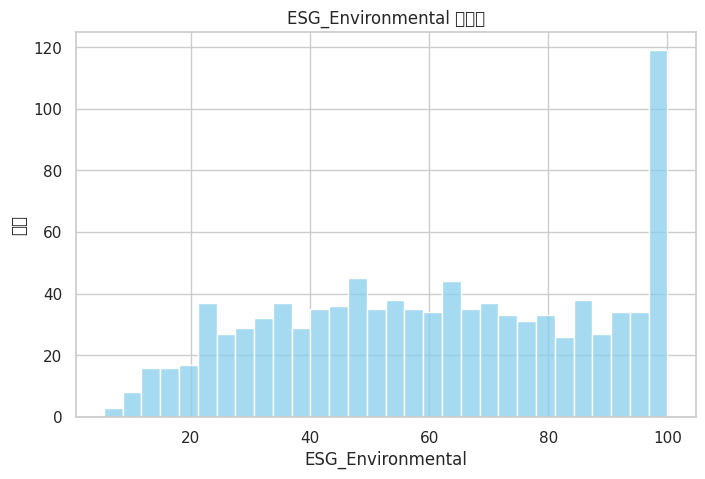

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30418 (\N{CJK UNIFIED IDEOGRAPH-76D2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24418 (\N{CJK UNIFIED IDEOGRAPH-5F62}) missing from font(s) DejaVu Sans.
  fig.canvas

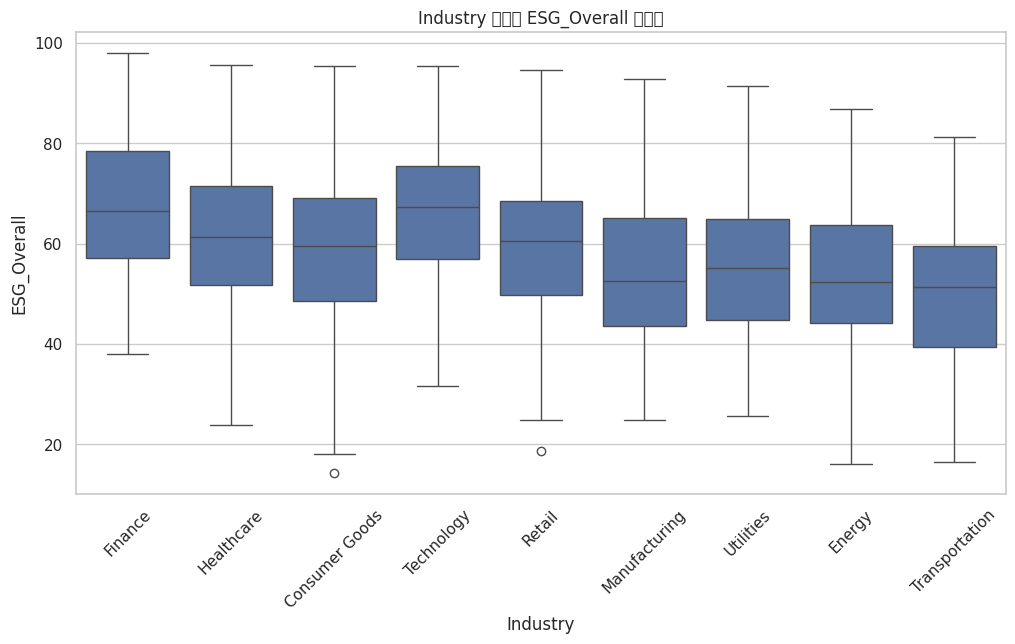

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32318 (\N{CJK UNIFIED IDEOGRAPH-7E3E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32068 (\N{CJK UNIFIED IDEOGRAPH-7D44}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  fig.canvas

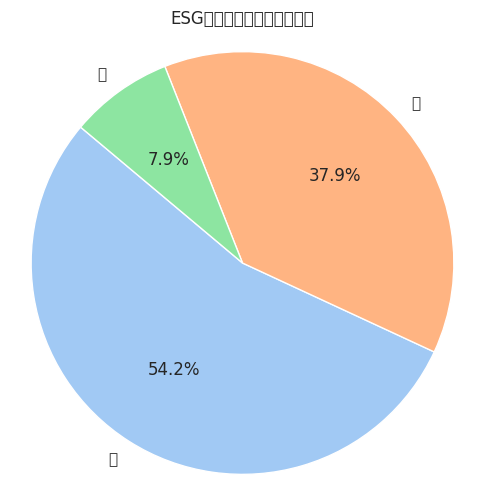

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 33287 (\N{CJK UNIFIED IDEOGRAPH-8207}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22294 (\N{CJK UNIFIED IDEOGRAPH-5716}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from font(s) DejaVu Sans.
  fig.canvas

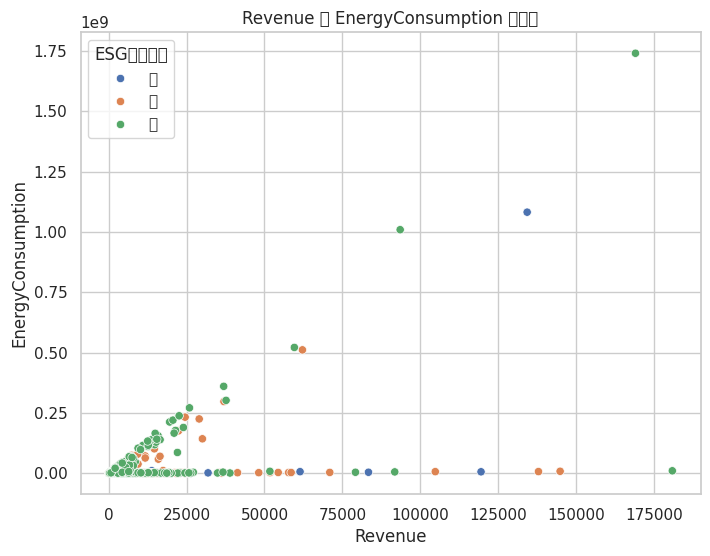

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 設定風格
sns.set(style="whitegrid")

# 1. ESG_Environmental 的直方圖
plt.figure(figsize=(8,5))
sns.histplot(Company_ESG['ESG_Environmental'], bins=30, kde=False, color='skyblue')
plt.title('ESG_Environmental 直方圖')
plt.xlabel('ESG_Environmental')
plt.ylabel('頻數')
plt.show()


# 2. 以 Industry 分組，ESG_Overall 的盒形圖
plt.figure(figsize=(12,6))
sns.boxplot(x='Industry', y='ESG_Overall', data=Company_ESG)
plt.title('Industry 分組的 ESG_Overall 盒形圖')
plt.xlabel('Industry')
plt.ylabel('ESG_Overall')
plt.xticks(rotation=45)
plt.show()


# 3. 第十題 ESG成績分組的資料筆數圓餅圖
group_counts = Company_ESG['ESG成績分組'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('ESG成績分組資料筆數圓餅圖')
plt.axis('equal')
plt.show()


# 4. Revenue 與 EnergyConsumption 的散佈圖
plt.figure(figsize=(8,6))
sns.scatterplot(x='Revenue', y='EnergyConsumption', data=Company_ESG, hue='ESG成績分組', palette='deep')
plt.title('Revenue 與 EnergyConsumption 散佈圖')
plt.xlabel('Revenue')
plt.ylabel('EnergyConsumption')
plt.legend(title='ESG成績分組')
plt.show()
